<a href="https://colab.research.google.com/github/Daps2831/Machine-Learning/blob/main/Week%202/Week_2_Citarum_Water_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount File

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

# Ganti path sesuai lokasi file di Google Drive
# note: dataset obesity_level diambil dari kaggle
file_path = "/content/drive/MyDrive/Dataset/CitarumWater.csv"
# Membaca file Excel
df = pd.read_csv(file_path)


## Data Preprocessing

In [7]:
# Tampilkan kolom kategorikal dan numerikal
print("\n--- Semua Kolom ---")
print(df.columns.tolist())

# Pisahkan kolom numerikal dan kategorikal
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("\n--- Kolom Categorikal ---")
print(list(categorical_cols))
print("\n--- Kolom Numerikal ---")
print(list(numerical_cols))


--- Semua Kolom ---
['No', 'NamaSungai', 'TitikPantau', 'Waktu', 'pH', 'Temp', 'TSS', 'DO', 'BOD', 'COD', 'Nitrat', 'FecalColiform', 'Fosfat', 'O2', 'IP', 'Class']

--- Kolom Categorikal ---
['NamaSungai', 'TitikPantau', 'Waktu', 'Temp', 'O2']

--- Kolom Numerikal ---
['No', 'pH', 'TSS', 'DO', 'BOD', 'COD', 'Nitrat', 'FecalColiform', 'Fosfat', 'IP', 'Class']


In [5]:
# Menampilkan 5 baris pertama
print("Data Awal:")
print(df.head())

# Menampilkan informasi ringkas tentang data (tipe data, nilai non-null)
print("\nInformasi Data:")
df.info()

# Menampilkan jumlah nilai yang hilang di setiap kolom
print("\nJumlah Nilai Hilang:")
print(df.isnull().sum())

Data Awal:
   No NamaSungai             TitikPantau       Waktu    pH     Temp   TSS  \
0   1    Citarum             Wangisagara  18/04/2018  7.57  25.55°C  11.0   
1   2    Citarum                   Koyod  18/04/2018  7.69  25.55°C  13.0   
2   3    Citarum   Setelah IPAL Cisirung  18/04/2018  7.39  25.55°C  15.0   
3   4    Citarum                 Nanjung  18/04/2018  7.49  25.55°C  17.0   
4   5    Citarum  Outlet Waduk Jatiluhur  18/04/2018  7.17  25.55°C   6.0   

     DO   BOD    COD  Nitrat  FecalColiform  Fosfat O2    IP  Class  
0  6.11  3.30   6.10    1.08        17000.0   0.043  -  5.12      3  
1  6.20  5.31  12.50    1.85        28000.0   0.011  -  5.91      3  
2  3.61  7.40  23.50    1.25        90000.0   0.230  -  7.76      3  
3  3.17  8.13  27.50    1.21       300000.0   0.057  -  9.61      3  
4  6.82  2.89   5.44    1.04         3000.0   0.110  -  2.44      2  

Informasi Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (t

In [12]:
from sklearn.preprocessing import LabelEncoder

# Pilih kolom kategorikal yang ingin di-encode
categorical_cols = ['NamaSungai', 'TitikPantau', 'Waktu', 'Temp', 'O2'] # Ganti dengan nama kolom kategorikal Anda

# Buat salinan dataframe agar tidak mengubah dataframe asli
df_encoded_only = df.copy()

# Lakukan encoding menggunakan LabelEncoder
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded_only[col] = le.fit_transform(df_encoded_only[col])

# Tampilkan beberapa baris pertama setelah encoding
print("\n--- Dataframe Setelah Encoding Variabel Kategorikal ---")
print(df_encoded_only.head())


--- Dataframe Setelah Encoding Variabel Kategorikal ---
   No  NamaSungai  TitikPantau  Waktu    pH  Temp   TSS    DO   BOD    COD  \
0   1           0            7    568  7.57     0  11.0  6.11  3.30   6.10   
1   2           0            2    568  7.69     0  13.0  6.20  5.31  12.50   
2   3           0            5    568  7.39     0  15.0  3.61  7.40  23.50   
3   4           0            3    568  7.49     0  17.0  3.17  8.13  27.50   
4   5           0            4    568  7.17     0   6.0  6.82  2.89   5.44   

   Nitrat  FecalColiform  Fosfat  O2    IP  Class  
0    1.08        17000.0   0.043   0  5.12      3  
1    1.85        28000.0   0.011   0  5.91      3  
2    1.25        90000.0   0.230   0  7.76      3  
3    1.21       300000.0   0.057   0  9.61      3  
4    1.04         3000.0   0.110   0  2.44      2  


# Machine Learning

In [19]:
# Memisahkan fitur (X) dan target (y)
X = df_encoded_only .drop('Class', axis=1)
y = df_encoded_only ['Class']

print("\nBentuk data Fitur (X):", X.shape)
print("Bentuk data Target (y):", y.shape)


Bentuk data Fitur (X): (2500, 15)
Bentuk data Target (y): (2500,)


In [20]:
from sklearn.model_selection import train_test_split

# Membagi data dengan rasio 80% data latih dan 20% data uji
# Gunakan X_scaled yang sudah distandardisasi
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print("\nUkuran data latih (X_train):", X_train.shape)
print("Ukuran data uji (X_test):", X_test.shape)


Ukuran data latih (X_train): (2000, 15)
Ukuran data uji (X_test): (500, 15)


In [22]:
from sklearn.preprocessing import StandardScaler


# Inisialisasi scaler
scaler = StandardScaler()

# Fit dan transform HANYA pada data latih (X_train)
X_train_scaled = scaler.fit_transform(X_train)

# Transform HANYA pada data uji (X_test) dengan scaler yang sudah di-fit
X_test_scaled = scaler.transform(X_test)

In [23]:

from sklearn.linear_model import LogisticRegression
import numpy as np

# 7. MEMBUAT DAN MELATIH MODEL LOGISTIC REGRESSION
# Inisialisasi model
model = LogisticRegression(random_state=42)

# Melatih model menggunakan data latih yang sudah di-scaling
model.fit(X_train_scaled, y_train)

# 8. MEMBUAT PREDIKSI
# Membuat prediksi pada data uji
y_pred = model.predict(X_test_scaled)

--- Metriks Evaluasi Lengkap ---
Akurasi : 0.9680
Presisi : 0.9682
Recall  : 0.9680
F1-Score: 0.9680

Laporan Klasifikasi:
              precision    recall  f1-score   support

           1       0.95      0.97      0.96       190
           2       0.98      0.97      0.97       299
           3       0.88      0.88      0.88         8
           4       1.00      1.00      1.00         3

    accuracy                           0.97       500
   macro avg       0.95      0.95      0.95       500
weighted avg       0.97      0.97      0.97       500



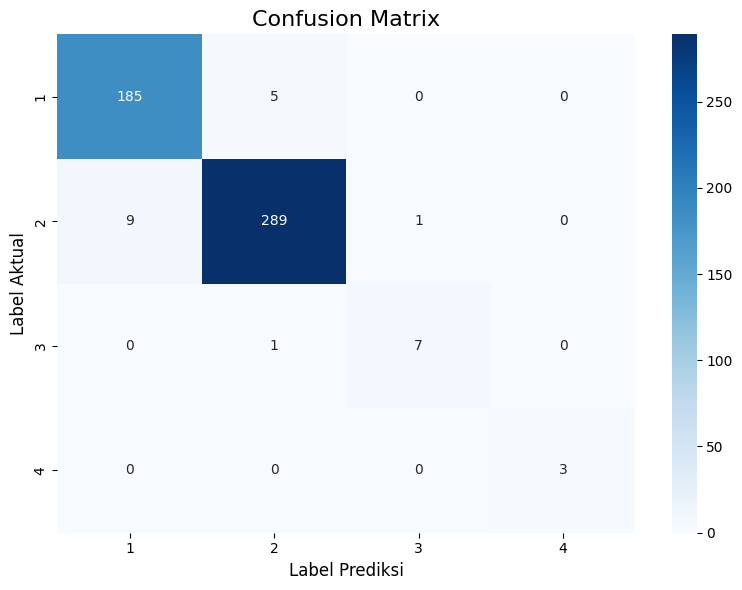


--- Pengaruh Fitur Terhadap Prediksi (Koefisien) ---
            Fitur  Koefisien
0              No   0.562012
3           Waktu   0.178639
7              DO   0.098597
11  FecalColiform   0.023448
13             O2   0.000000
5            Temp   0.000000
1      NamaSungai   0.000000
4              pH  -0.077812
12         Fosfat  -0.078665
6             TSS  -0.118599
10         Nitrat  -0.175476
2     TitikPantau  -0.229578
9             COD  -0.665218
8             BOD  -3.513974
14             IP  -9.518172


In [40]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have defined class_names based on your data's classes
# Example: class_names = ['Class 1', 'Class 2', 'Class 3', 'Class 4']
# Replace with your actual class names
class_names = [str(c) for c in sorted(y_test.unique())]


# MENGHITUNG DAN MENAMPILKAN METRIKS EVALUASI
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted') # Use 'weighted' average for multiclass
recall = recall_score(y_test, y_pred, average='weighted') # Use 'weighted' average for multiclass
f1 = f1_score(y_test, y_pred, average='weighted') # Use 'weighted' average for multiclass


print("--- Metriks Evaluasi Lengkap ---")
print(f"Akurasi : {accuracy:.4f}")
print(f"Presisi : {precision:.4f}")
print(f"Recall  : {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
# Removed AUC calculation as y_pred_proba is not defined for predict() output
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred, target_names=class_names))

# 10. VISUALISASI CONFUSION MATRIX
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Label Aktual', fontsize=12)
plt.xlabel('Label Prediksi', fontsize=12)
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show() # Add plt.show() to display the plot
# plt.close() # Remove plt.close() so the plot is displayed

# (Opsional) Menampilkan Koefisien Fitur (Feature Importance)
# Koefisien ini menunjukkan seberapa besar pengaruh setiap fitur terhadap prediksi
feature_names = X.columns
coefficients = model.coef_[0]

# Membuat DataFrame untuk visualisasi yang lebih baik
coeff_df = pd.DataFrame({'Fitur': feature_names, 'Koefisien': coefficients})
coeff_df = coeff_df.sort_values(by='Koefisien', ascending=False)

print("\n--- Pengaruh Fitur Terhadap Prediksi (Koefisien) ---")
print(coeff_df)

### Penjelasan Persamaan Matematika

Berikut adalah penjelasan untuk setiap konsep dan persamaan matematika yang digunakan dalam analisis ini.

#### 1\. Regresi Logistik

Regresi Logistik adalah algoritma klasifikasi yang digunakan untuk memprediksi probabilitas dari suatu kejadian dengan mencocokkan data pada fungsi logit.

**a. Fungsi Sigmoid (Fungsi Logistik)**
Fungsi sigmoid adalah inti dari regresi logistik. Fungsi ini mengubah output apa pun menjadi nilai antara 0 dan 1, yang dapat diinterpretasikan sebagai probabilitas.

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

  * $\\sigma(z)$ adalah probabilitas hasil.
  * $z$ adalah input ke fungsi, yang merupakan kombinasi linear dari fitur-fitur.
  * $e$ adalah basis dari logaritma natural.

**b. Persamaan Regresi Logistik**
Persamaan regresi logistik memprediksi probabilitas bahwa suatu sampel data termasuk dalam kelas positif (dalam kasus ini, memiliki penyakit jantung).

$$P(y=1 | X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1X_1 + \dots + \beta_nX_n)}}$$

  * $P(y=1 | X)$ adalah probabilitas kelas target adalah 1 (memiliki penyakit jantung) datoberian fitur $X$.
  * $\\beta\_0$ adalah intercept (bias).
  * $\\beta\_1, \\dots, \\beta\_n$ adalah koefisien (bobot) untuk setiap fitur $X\_1, \\dots, X\_n$.

-----

#### 2\. Matriks Evaluasi

Untuk mengevaluasi seberapa baik model klasifikasi kita bekerja, kita menggunakan beberapa metrik. Metrik-metrik ini berasal dari **Confusion Matrix**, yang membandingkan prediksi model dengan nilai aktual.

  * **True Positive (TP)**: Prediksi benar bahwa pasien memiliki penyakit jantung.
  * **True Negative (TN)**: Prediksi benar bahwa pasien tidak memiliki penyakit jantung.
  * **False Positive (FP)**: Prediksi salah, model memprediksi ada penyakit padahal tidak ada (Error Tipe I).
  * **False Negative (FN)**: Prediksi salah, model memprediksi tidak ada penyakit padahal ada (Error Tipe II).

**a. Akurasi (Accuracy)**
Akurasi mengukur seberapa sering model membuat prediksi yang benar. Ini adalah rasio dari prediksi yang benar (TP + TN) terhadap total semua prediksi.

$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$

**b. Presisi (Precision)**
Presisi menjawab pertanyaan: "Dari semua pasien yang kita prediksi memiliki penyakit jantung, berapa banyak yang sebenarnya benar?" Ini penting ketika biaya dari *False Positive* tinggi.

$$\text{Precision} = \frac{TP}{TP + FP}$$

**c. Recall (Sensitivity)**
Recall menjawab pertanyaan: "Dari semua pasien yang sebenarnya memiliki penyakit jantung, berapa banyak yang berhasil kita prediksi?" Ini penting ketika biaya dari *False Negative* tinggi.

$$\text{Recall} = \frac{TP}{TP + FN}$$

**d. F1-Score**
F1-Score adalah rata-rata harmonik dari Presisi dan Recall. Metrik ini berguna ketika kita ingin mencari keseimbangan antara Presisi dan Recall.

$$F1\text{-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$

**e. ROC Curve dan AUC**

  * **ROC (Receiver Operating Characteristic) Curve**: Kurva ROC adalah plot dari **True Positive Rate (Recall)** terhadap **False Positive Rate** pada berbagai ambang batas klasifikasi.

      * **True Positive Rate (TPR)**: Sama dengan Recall.
        $$\text{TPR} = \frac{TP}{TP + FN}$$
      * **False Positive Rate (FPR)**: Rasio dari kasus negatif yang salah diklasifikasikan sebagai positif.
        $$\text{FPR} = \frac{FP}{FP + TN}$$

  * **AUC (Area Under the Curve)**: AUC mengukur seluruh area dua dimensi di bawah kurva ROC. AUC memberikan ukuran agregat dari kinerja di semua ambang batas klasifikasi.

      * **AUC = 1**: Model sempurna.
      * **AUC = 0.5**: Model tidak lebih baik dari tebakan acak.
      * **AUC \< 0.5**: Model lebih buruk dari tebakan acak.

Nilai **AUC sebesar 0.93** menunjukkan bahwa model ini memiliki kemampuan yang sangat baik untuk membedakan antara pasien dengan dan tanpa penyakit jantung.